# Importing the Libraries

In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [598]:
ds= pd.read_csv('gender_classification_v7.csv')

In [599]:
ds.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# Data Understanding

In [600]:
ds.shape

(5001, 8)

In [601]:
features=ds.columns
features

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [602]:
ds.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [603]:
ds.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [604]:
ds['long_hair'].value_counts()

1    4349
0     652
Name: long_hair, dtype: int64

In [605]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# Data Exploration

<AxesSubplot:>

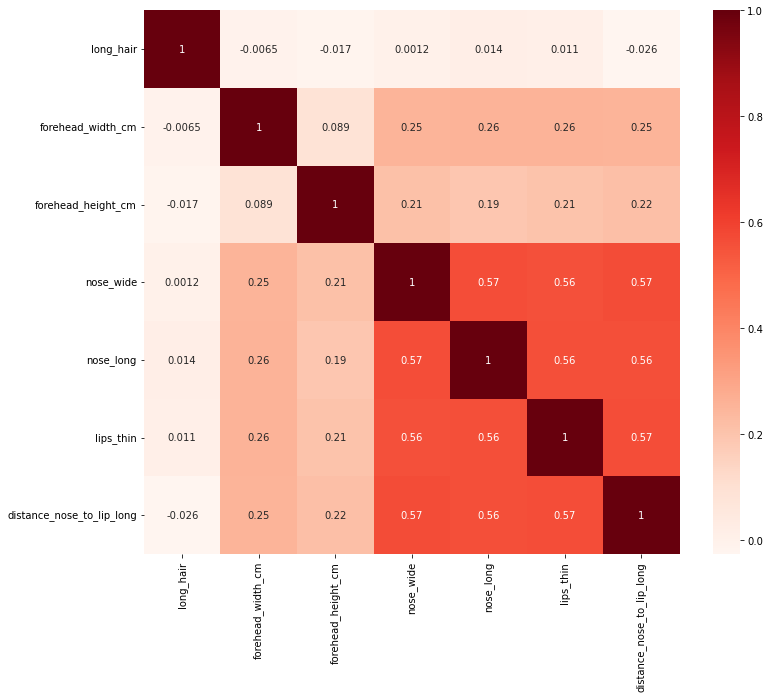

In [606]:
plt.subplots(figsize=(12,10))
sns.heatmap(ds.corr() , annot = True ,cmap='Reds', cbar = True)

Nose and Lip related features has more correlation.

Forehead and Hair related feature has less correlation. 

Female    2501
Male      2500
Name: gender, dtype: int64


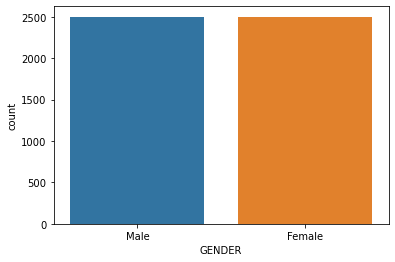

In [607]:
#Visualize the number of instances in the target attribute
sns.countplot(ds['gender']);
plt.xlabel('GENDER')
plt.ylabel('count')

print(ds['gender'].value_counts())

 No.of males and females are very balanced.

array([[<AxesSubplot:title={'center':'long_hair'}>,
        <AxesSubplot:title={'center':'forehead_width_cm'}>,
        <AxesSubplot:title={'center':'forehead_height_cm'}>],
       [<AxesSubplot:title={'center':'nose_wide'}>,
        <AxesSubplot:title={'center':'nose_long'}>,
        <AxesSubplot:title={'center':'lips_thin'}>],
       [<AxesSubplot:title={'center':'distance_nose_to_lip_long'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

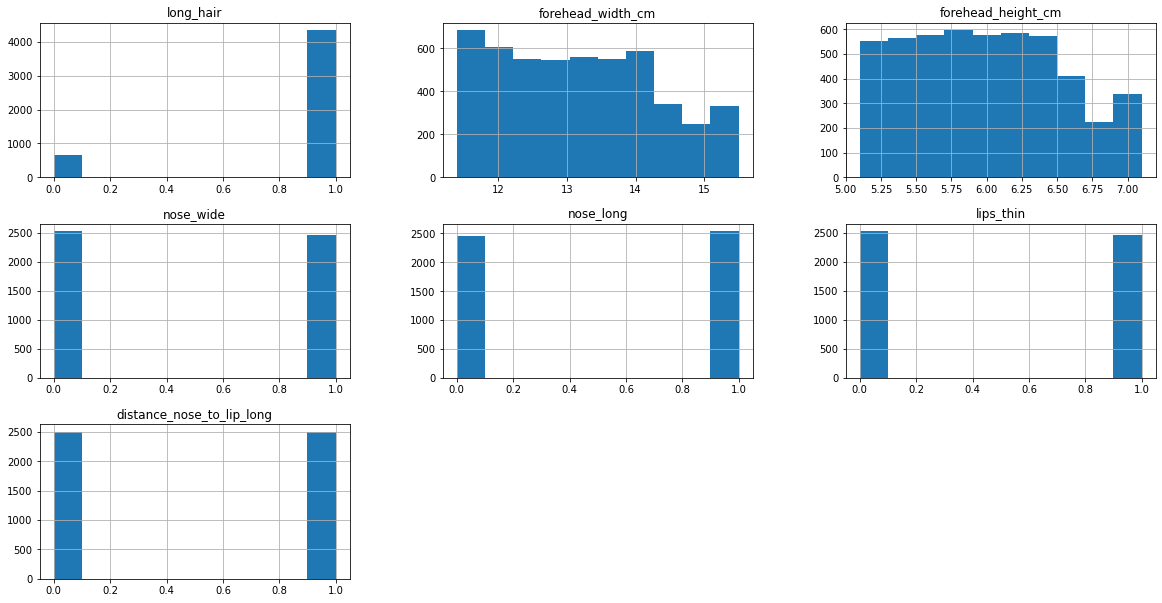

In [608]:
ds.iloc[:,:-1].hist(figsize=[20,25], layout=[7,3])

# Defining the Input and Output Variables

In [640]:
X = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [641]:
X

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [642]:
y

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)


# Data Preprocessing

In [643]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(y)

In [656]:
y

array([1, 0, 1, ..., 0, 0, 1])

In [614]:
# # # Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.38719442, -1.24793291,  0.28397148, ..., -1.01592361,
         1.01389375,  1.00220198],
       [-2.58268182,  0.73938869, -1.00941773, ..., -1.01592361,
         1.01389375, -0.99780285],
       [-2.58268182, -1.24793291,  0.65351125, ...,  0.98432598,
         1.01389375,  1.00220198],
       ...,
       [ 0.38719442, -0.25427211, -0.45510807, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  0.01672629,  0.46874136, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  2.00404789, -1.00941773, ...,  0.98432598,
         1.01389375,  1.00220198]])

In [615]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# K-Nearest Neighbors

In [616]:
# Building the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 37, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [617]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [618]:
# Building a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[753,  11],
       [ 31, 706]], dtype=int64)

In [619]:
# Calculating the accuracy score
from sklearn.metrics import accuracy_score, classification_report
ac = accuracy_score(y_test, y_pred)
ac_knn = ac*100
ac_knn

97.2018654230513

In [620]:
# Finding the value of K
import sklearn.metrics as metrics

k_range = range(1,50)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9633577614923384, 0.9580279813457695, 0.966688874083944, 0.9653564290473018, 0.9673550966022652, 0.9680213191205863, 0.9693537641572285, 0.9686875416389074, 0.9693537641572285, 0.9693537641572285, 0.9700199866755497, 0.9693537641572285, 0.9680213191205863, 0.9686875416389074, 0.9680213191205863, 0.9673550966022652, 0.966688874083944, 0.9673550966022652, 0.9673550966022652, 0.9680213191205863, 0.9686875416389074, 0.9700199866755497, 0.9680213191205863, 0.9686875416389074, 0.9686875416389074, 0.9686875416389074, 0.9693537641572285, 0.9700199866755497, 0.9686875416389074, 0.9700199866755497, 0.9693537641572285, 0.9693537641572285, 0.9700199866755497, 0.9693537641572285, 0.9706862091938707, 0.9713524317121919, 0.972018654230513, 0.9713524317121919, 0.972018654230513, 0.9713524317121919, 0.972018654230513, 0.972018654230513, 0.9706862091938707, 0.9700199866755497, 0.9713524317121919, 0.9713524317121919, 0.9706862091938707, 0.9706862091938707, 0.972018654230513]


Text(0, 0.5, 'Testing Accuracy')

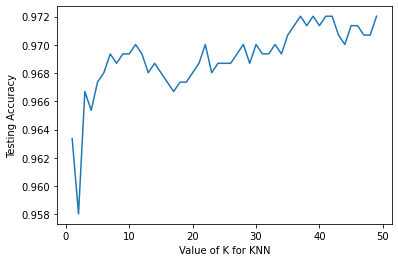

In [621]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [622]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       764
           1       0.98      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Decision Tree Classifier

In [623]:
# Building the model
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion ='entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [624]:
y_pred = DT.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [625]:
# Building the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[744,  20],
       [ 32, 705]], dtype=int64)

In [626]:
# Claculating the accuracy score
ac = accuracy_score(y_test, y_pred)
ac_dt = ac*100
ac_dt

96.53564290473018

In [627]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       764
           1       0.97      0.96      0.96       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Random Forest Classifier


In [628]:
# Building the Model
from sklearn.ensemble import RandomForestClassifier
#initialize the RF model using Entropy (Information Gain)
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [629]:
y_pred =  RF.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [630]:
# Building the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[745,  19],
       [ 33, 704]], dtype=int64)

In [631]:
# Calculating the accuracy score
ac=accuracy_score(y_test, y_pred)
ac_rf = ac*100
ac_rf

96.53564290473018

In [632]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       778
           1       0.96      0.97      0.96       723

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Support Vector Classifier (Linear Kernel)

In [633]:
# Building the model
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [634]:
y_pred = SVM.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [635]:
# Building the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[741,  23],
       [ 23, 714]], dtype=int64)

In [636]:
# Calculating the accuracy score
ac = accuracy_score(y_test, y_pred)
ac_svm = ac*100
ac_svm

96.93537641572286

In [637]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       764
           1       0.97      0.97      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Building Accuracy score table

In [638]:
model= ['DT','RF','KNN','SVM']
ac_score= [ac_dt,ac_rf,ac_knn,ac_svm]
tbl= pd.DataFrame(list(zip(model,ac_score)))
tbl.columns = ['MODEL', 'ACCURACY SCORE']
tbl

,MODEL,ACCURACY SCORE
0,DT,96.535643
1,RF,96.535643
2,KNN,97.201865
3,SVM,96.935376
